# Data Access Methods

This tutorial demostrates several ways data can be accessed remotely and loaded into a Python environment, including

* THREDDS/OPeNDAP
* OGC Web Map Service (WMS)
* OGC Web Feature Service (WFS)
* direct access to files on cloud storage (AWS S3)
* New OGC APIs?

I could also mention cloud-optimised formats like Zarr and Parquet

## THREDDS / OPeNDAP

(already covered in [00-data-access.ipynb](01-Tue/00-data-access-in-python/00-data-access.ipynb))

## Web Map Service (WMS)

(already covered in [00-data-access.ipynb](01-Tue/00-data-access-in-python/00-data-access.ipynb))

## Web Feature Service (WFS)

* A [standard](http://www.opengeospatial.org/standards/wfs) of the [Open Geospatial Consortium](http://www.opengeospatial.org/) (OGC)
* Allows geographic _features_ (spatial extent + data) to be accessed via the Web.
* Allows filtering based on spatial extent and attributes.

For example, most of the tabular (1-dimensional) data from the Australian Integrated Marine Observing System (IMOS) is available via WFS.

In [14]:
from owslib.wfs import WebFeatureService

wfs = WebFeatureService(url="https://geoserver-123.aodn.org.au/geoserver/wfs",
                        version="1.1.0")
wfs.identification.title

'AODN Web Feature Service (WFS)'

In [15]:
[op.name for op in wfs.operations]

['GetCapabilities', 'DescribeFeatureType', 'GetFeature', 'GetGmlObject']

In [19]:
# Each dataset is served as a separate "featureType":
print(f"There are {len(wfs.contents)} fature types, e.g.")
list(wfs.contents)[:20]

There are 397 fature types, e.g.


['imos:anmn_ctd_profiles_data',
 'imos:anmn_ctd_profiles_map',
 'imos:anmn_velocity_timeseries_map',
 'imos:anmn_nrs_rt_meteo_timeseries_data',
 'imos:anmn_nrs_rt_meteo_timeseries_map',
 'imos:anmn_nrs_rt_bio_timeseries_data',
 'imos:anmn_nrs_rt_bio_timeseries_map',
 'imos:anmn_nrs_rt_wave_timeseries_data',
 'imos:anmn_nrs_rt_wave_timeseries_map',
 'imos:anmn_acoustics_map',
 'imos:anmn_burst_avg_timeseries_data',
 'imos:anmn_burst_avg_timeseries_map',
 'imos:anmn_ts_timeseries_data',
 'imos:anmn_ts_timeseries_map',
 'aodn:cleveland_bay_data',
 'aodn:coastal_watch_locations',
 'aodn:bluenet_datasets_capricorn_channel',
 'aodn:bluenet_datasets_leeuwin_current',
 'aodn:bluenet_datasets_southern_indian_ocean',
 'aodn:bluenet_datasets_indian_ocean']

In [49]:
typename = 'imos:anmn_ctd_profiles_data'
print(wfs[typename].title)
print(wfs[typename].abstract)

ANMN CTD  profiles (data)
This collection includes CTD profile data transmitted since 2009 from the National Reference Stations (NRS) and some regional coastal moorings from the Australian National Mooring Network (ANMN). Each mooring is equipped with a SBE19 plus CTD, measuring temperature, salinity, pressure, dissolved oxygen, chlorophyll concentration, and turbidity. These data are processed in delayed mode, with automated quality control applied.


In [50]:
wfs.get_schema(typename)

{'properties': {'file_id': 'int',
  'site_code': 'string',
  'cruise_id': 'string',
  'time_coverage_start': 'dateTime',
  'time_coverage_end': 'dateTime',
  'TIME': 'dateTime',
  'INSTANCE': 'int',
  'DIRECTION': 'string',
  'TIME_quality_control': 'string',
  'LATITUDE': 'double',
  'LATITUDE_quality_control': 'string',
  'LONGITUDE': 'double',
  'LONGITUDE_quality_control': 'string',
  'DEPTH': 'float',
  'DEPTH_quality_control': 'string',
  'BOT_DEPTH': 'float',
  'BOT_DEPTH_quality_control': 'string',
  'PRES_REL': 'float',
  'PRES_REL_quality_control': 'string',
  'TEMP': 'float',
  'TEMP_quality_control': 'string',
  'PSAL': 'float',
  'PSAL_quality_control': 'string',
  'DOX2': 'float',
  'DOX2_quality_control': 'string',
  'TURB': 'float',
  'TURB_quality_control': 'string',
  'CHLF': 'float',
  'CHLF_quality_control': 'string',
  'CHLU': 'float',
  'CHLU_quality_control': 'string',
  'CPHL': 'float',
  'CPHL_quality_control': 'string',
  'CNDC': 'float',
  'CNDC_quality_contr

Let's read some CTD profile data using a bounding box (near Rottnest Island, just off Perth, WA).
We'll get the result in CSV format so it's easy to read into a Pandas DataFrame.

In [60]:
import pandas as pd

xmin, xmax = 115.2, 115.7
ymin, ymax = -32.2, -31.8

response = wfs.getfeature(typename=typename, bbox=(xmin, ymin, xmax, ymax), outputFormat='csv')
df = pd.read_csv(response)
response.close()

df.head()

,FID,file_id,site_code,cruise_id,time_coverage_start,time_coverage_end,TIME,INSTANCE,DIRECTION,TIME_quality_control,...,CHLU_quality_control,CPHL,CPHL_quality_control,CNDC,CNDC_quality_control,DESC,DESC_quality_control,DENS,DENS_quality_control,geom
0,anmn_ctd_profiles_data.fid--6fff0f0_1893e75122...,34,NRSROT,3019.0,2010-09-24T04:46:41,2010-09-24T04:46:41,2010-09-24T04:46:42,1.0,D,4.0,...,NaN,NaN,NaN,4.9325,4,0.056,4.0,1024.6525,4.0,POINT (-32 115.4)
1,anmn_ctd_profiles_data.fid--6fff0f0_1893e75122...,34,NRSROT,3019.0,2010-09-24T04:46:41,2010-09-24T04:46:41,2010-09-24T04:46:42,1.0,D,4.0,...,NaN,NaN,NaN,4.8653,4,0.205,4.0,1025.0679,4.0,POINT (-32 115.4)
2,anmn_ctd_profiles_data.fid--6fff0f0_1893e75122...,34,NRSROT,3019.0,2010-09-24T04:46:41,2010-09-24T04:46:41,2010-09-24T04:46:42,1.0,D,4.0,...,NaN,NaN,NaN,4.8494,4,0.155,4.0,1025.1801,4.0,POINT (-32 115.4)
3,anmn_ctd_profiles_data.fid--6fff0f0_1893e75122...,34,NRSROT,3019.0,2010-09-24T04:46:41,2010-09-24T04:46:41,2010-09-24T04:46:42,1.0,D,4.0,...,NaN,NaN,NaN,4.8448,4,0.239,4.0,1025.1919,4.0,POINT (-32 115.4)
4,anmn_ctd_profiles_data.fid--6fff0f0_1893e75122...,34,NRSROT,3019.0,2010-09-24T04:46:41,2010-09-24T04:46:41,2010-09-24T04:46:42,1.0,D,4.0,...,NaN,NaN,NaN,4.8424,4,0.256,4.0,1025.2028,4.0,POINT (-32 115.4)


We can also create filters based on the data columns (properties) and get the server to return only a subset of the properties.

In [71]:
from owslib.etree import etree
from owslib.fes import PropertyIsEqualTo, And

filter = And([PropertyIsEqualTo(propertyname="site_code", literal="NRSROT"),
              PropertyIsEqualTo(propertyname="TEMP_quality_control", literal="1"),
              PropertyIsEqualTo(propertyname="PRES_REL_quality_control", literal="1")
             ])
filterxml = etree.tostring(filter.toXML(), encoding="unicode")
response = wfs.getfeature(typename=typename, filter=filterxml, outputFormat="csv",
                          propertyname=["TIME", "DEPTH", "PRES_REL", "TEMP", "TEMP_quality_control"]
                         )
df = pd.read_csv(response, parse_dates=["TIME"])
response.close()

# drop the feature ID column added by the server
df.drop(columns='FID', inplace=True)

df

,TIME,DEPTH,PRES_REL,TEMP,TEMP_quality_control
0,2010-11-24 03:33:18,1,1.007,21.1040,1
1,2010-11-24 03:33:18,2,2.014,21.0543,1
2,2010-11-24 03:33:18,3,3.021,20.9429,1
3,2010-11-24 03:33:18,4,4.028,20.8039,1
4,2010-11-24 03:33:18,5,5.035,20.7662,1
...,...,...,...,...,...
6040,2023-06-13 01:36:02,42,42.299,20.6584,1
6041,2023-06-13 01:36:02,43,43.306,20.6608,1
6042,2023-06-13 01:36:02,44,44.313,20.6614,1
6043,2023-06-13 01:36:02,45,45.321,20.6616,1


<AxesSubplot:xlabel='TEMP'>

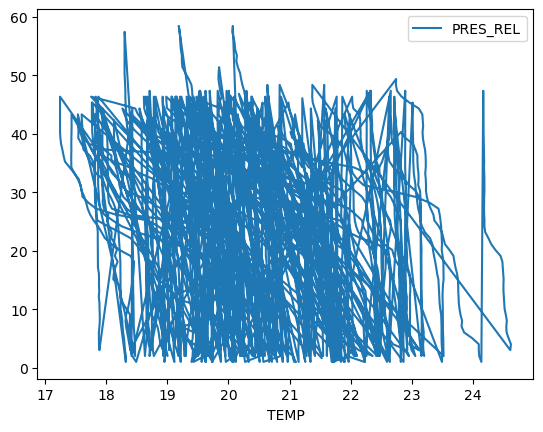

In [72]:
# Let's do a quick plot

df.plot(x="TEMP", y="PRES_REL")

## Direct access to cloud storage

Data files made available to the public on cloud storage such as Amazon S3 can be accessed over the web as if they were stored locally. You just need to find the URL for each file.

... (example opening a netcdf file, reading metadata and plotting one variable) ...

It's worth understanding a little about how this works. 
The above example only reads the metadata and _a subset_ of the data, the entire file is read from S3 and returned. This is because unlike a local filesytem, the basic read/write operations on cloud storage operate on the entire object (file). 
If you only need a small subset of a large file, this can be a very inefficient way to get it.

### Zarr - a cloud-optimised data format



### Parquet?

## New OGC APIs?